# PRÁCTICA 1: MANEJO DE TENSORES Y BACKPROPAGATION


La primera práctica de este curso consistirá en una introducción a `PyTorch`, incluyendo el manejo de tensores, dispositivos y brackpropagation.

La práctica consistirá en la optimización de una función sencilla en la que aplicaremos todos los conceptos anteriores. Es importante destacar que para esta práctica no se definirá ninguna red neuronal. No obstante, veremos que las librerías de Deep Learning como PyTorch se pueden aprovechar para solucionar problemas complejos y tener acceso a computación en GPU sin necesidad de aplicar la misma a problemas de redes neuronales.

In [5]:
import numpy as np

import torch

import matplotlib.pyplot as plt

En primer lugar, veremos las principales maneras de definir un tensor en PyTorch. A modo de resumen, existen dos maneras diferentes:
   - A partir de un objeto/variable previo (Numpy array, Pandas...)
   - Definir el tensor de manera directa con Pytorch

In [7]:
# Declaración de un tensor directamente con PyTorch
x = torch.Tensor([1, 2, 3], device=torch.device('cpu'))  # El parámetro "device" nos permite especificar el dispositivo en el que creamos el tensor (generalmente "cpu" o "cuda")
x.to(torch.device('cuda'))  # Con esta sintaxis, podemos mover fácilmente un tensor entre dispositivos. Sin embargo, esta transferencia toma algo de tiempo.
x

tensor([1., 2., 3.], device='cuda:0')

Es una práctica muy recomendable mover el mínimo número de veces un tensor entre dispotivos para reducir los tiempos de ejecución. Por ejemplo, si estamos seguros de querer usar la GPU, es mejor práctica definir esta variable directamente en este dispotivo usando el atributo `device` durante la instancia.

In [8]:
# Declaración de un Tensor a partir de un array de Numpy
x = np.random.normal(size=100)
x = torch.from_numpy(x)  # Por defecto, siempre se genera este array en CPU
x.to(torch.device('cuda'))

tensor([ 1.0666,  0.0173, -0.2341,  0.7856,  0.5496, -0.3936,  0.8527,  0.9674,
         0.7525,  1.8848, -1.0512, -0.7139,  1.1008,  0.3177,  0.8842,  0.1971,
        -2.5675, -0.7907, -0.3035, -0.7926,  0.0170,  0.9675,  0.7253, -0.0301,
        -0.0510, -1.0458,  1.2196, -0.2533,  0.3900,  0.2992, -0.6301,  0.1546,
         0.4073,  1.4010, -1.6666, -1.8572, -2.0824, -0.4960, -0.7370,  0.7995,
         1.7627, -0.0426,  0.6256,  0.1320,  0.9328, -1.5149,  1.4156, -0.1944,
         1.0622,  1.2225, -1.2637,  0.6064,  1.1384, -2.1577,  0.3689,  0.7047,
        -0.5635, -0.4365, -0.3965,  0.2126,  0.0108, -0.0719,  0.4085,  0.6640,
         0.9177,  0.5842, -1.1605,  1.3017,  0.8987,  0.7242,  1.2662,  0.5654,
        -0.5906,  0.2785,  0.7494,  0.0229, -1.0114, -0.3789, -0.4024, -0.6273,
         0.4786, -0.4570,  1.1123,  0.7001, -2.0621,  0.6952, -1.8830, -0.9751,
         1.0114,  0.0450, -0.0053,  1.9411, -1.3876, -0.3431, -0.5306,  1.9927,
         0.3626,  0.9978, -1.3817, -0.76

La sintaxis entre PyTorch y Numpy es muy similar y, por norma general, existe una correspondencia directa entre los métodos de Numpy y PyTorch (en algunos casos, también de Scipy). Antes de definir una variable con Numpy, es recomendable comprobar en la documentación de PyTorch si existe una alternativa que haga la misma acción para así poder definir la variable directametne en el dispositivo adecuado

In [13]:
x = torch.normal(mean=0., std=1., size=(100,), device=torch.device('cuda'))
x

tensor([ 3.0564e-01, -1.5971e+00,  1.8976e+00, -1.3764e+00,  9.5507e-04,
        -7.6400e-02, -1.8846e+00, -5.0361e-01, -1.6375e-01, -7.4226e-01,
        -4.4824e-01, -5.7366e-01,  2.1122e-01,  1.6420e+00, -2.6547e-01,
        -5.4350e-02,  1.6569e+00, -1.9677e-01,  2.2137e-01, -8.9508e-02,
        -1.3107e-01,  4.2035e-01,  8.3199e-01,  4.1687e-02,  1.6757e+00,
         9.4850e-01, -6.7394e-01,  9.1440e-01, -1.8082e-01, -5.7369e-01,
         1.9049e+00,  4.1909e-01,  7.0954e-01,  2.6318e-01,  8.6108e-01,
        -1.4618e+00, -9.2851e-01,  2.0801e+00,  1.0133e+00,  1.5736e+00,
        -2.4781e-01,  2.8892e-02, -1.4613e+00,  3.5310e-01,  8.3009e-02,
         1.7652e+00, -3.0988e-01, -5.6993e-01, -1.0601e+00, -1.5992e-01,
        -1.2014e+00,  7.7833e-01,  1.5156e+00, -1.3833e+00, -6.7733e-01,
        -1.4369e+00, -1.1818e+00,  8.1570e-01,  1.0160e-01, -1.5079e-01,
        -6.1535e-01,  9.5307e-01, -1.1384e-01, -1.0606e+00,  1.4418e+00,
        -1.8653e+00, -3.8273e-01,  2.0541e-01, -1.1

Si cada vez que definimos un Tensor preferimos que PyTorch lo instancie por defecto en un dispositivo determinado, podemos usar la siguientes funciones:

In [14]:
torch.get_default_device()
torch.set_default_device('cuda')
torch.get_default_device()
# torch.set_default_device('cuda:1')  # Sintaxis en el caso de que tengamos varias GPUs. En este caso, usaríamos como dispositivo por defecto la segunda GPU (los IDs empiezan en 0)

device(type='cuda', index=0)

Continuemos la práctica con un ejemplo sencillo de como podemos aprovechar PyTorch para resolver un problema de optimización general. Con este ejemplo, abordaremos varios conceptos que serán de gran utilidad para las prácticas posteriores con redes neuronales.

En primer lugar, vamos a definir el conjunto de datos que usaremos para esta práctica. El objetivo será encontrar los parámetros (a,k,b) para hacer un ajuste de una curva exponencial a unos datos.

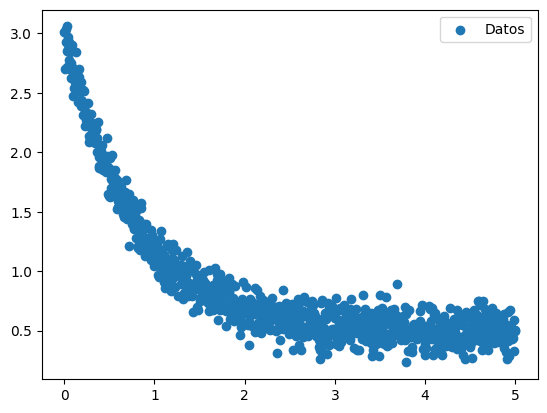

In [114]:
n = 1000  # Cantidad de puntos en nuestro datos
noise = torch.normal(mean=0., std=0.1, size=(n,), device=torch.device('cuda'))
x = torch.linspace(0, 5, n)
true_a, true_k, true_b = 2.5, 1.3, 0.5
y = true_a * torch.exp(-true_k * x) + true_b + noise

plt.figure()
plt.scatter(x.cpu(), y.cpu(), label='Datos')
plt.legend()

Una vez tenemos los datos generados, vamos a definir las variables y el optimizador que usaremos para encontrar los parámetros (a,k,b).

En PyTorch, un parámetro es un Tensor al que se le asocia un gradiente, el cuál será usado durante la etapa de backpropagation para optimizar su valor. El optimizador es el encargado de tomar estos gradientes y aplicarlos a los valores actuales de los parámetros para actualizar su valor de acuerdo a su gradiente.

In [128]:
a, k, b = torch.randn((), requires_grad=True), torch.randn((), requires_grad=True), torch.randn((), requires_grad=True)
optimizer = torch.optim.Adam([a, k, b], lr=0.1)
print("Valores (a,k,b) iniciales: (" + str(a.item()) + "," + str(k.item()) + "," + str(b.item()) + ")")  # Necesitamos usar item() para recuperar el valor del parámetro (solo necesario si requires_grad=True)

Valores (a,k,b) iniciales: (-0.8074843287467957,0.3413424491882324,-0.024551229551434517)


Una vez tenemos definidos nuestros parámetros y el optimizador, podemos definir el loop de optimización para buscar los valores óptimos de (a,k,b).

Epoch [5/500], Loss: 0.8773, a: -0.3256, k: 0.7795, b: 0.4620
Epoch [10/500], Loss: 0.3523, a: 0.0890, k: 1.0461, b: 0.8659
Epoch [15/500], Loss: 0.3162, a: 0.4202, k: 1.1999, b: 1.0942
Epoch [20/500], Loss: 0.3150, a: 0.6726, k: 1.3008, b: 1.1123
Epoch [25/500], Loss: 0.2294, a: 0.8682, k: 1.3758, b: 0.9838
Epoch [30/500], Loss: 0.1469, a: 1.0368, k: 1.4253, b: 0.8065
Epoch [35/500], Loss: 0.1138, a: 1.2026, k: 1.4392, b: 0.6640
Epoch [40/500], Loss: 0.0965, a: 1.3763, k: 1.4112, b: 0.5993
Epoch [45/500], Loss: 0.0694, a: 1.5545, k: 1.3472, b: 0.6028
Epoch [50/500], Loss: 0.0462, a: 1.7237, k: 1.2679, b: 0.6297
Epoch [55/500], Loss: 0.0357, a: 1.8694, k: 1.2023, b: 0.6347
Epoch [60/500], Loss: 0.0280, a: 1.9849, k: 1.1705, b: 0.6011
Epoch [65/500], Loss: 0.0202, a: 2.0753, k: 1.1659, b: 0.5461
Epoch [70/500], Loss: 0.0165, a: 2.1519, k: 1.1650, b: 0.5004
Epoch [75/500], Loss: 0.0146, a: 2.2214, k: 1.1532, b: 0.4806
Epoch [80/500], Loss: 0.0130, a: 2.2827, k: 1.1367, b: 0.4796
Epoch [8

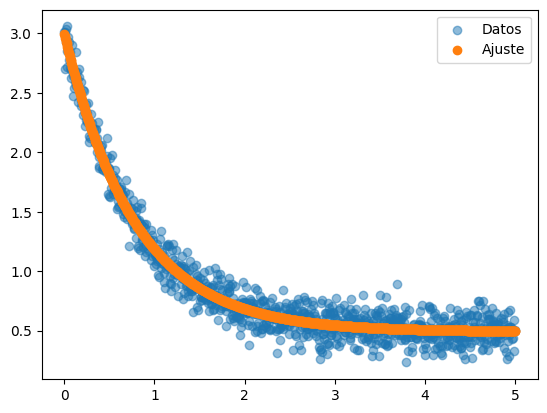

In [129]:
EPOCHS = 500  # El número de "pasos" de optimización que realizaremos

for epoch in range(EPOCHS):
    # Calcular predicciones del modelo
    y_pred = a * torch.exp(-k * x) + b

    # Calcular la pérdida
    loss = ((y_pred - y) ** 2).mean()

    # Poner a cero los gradientes acumulados de la iteración anterior
    optimizer.zero_grad()

    # Calcular los gradientes de la pérdida respecto a a, k, b
    loss.backward()

    # Actualizar los parámetros usando el optimizador
    optimizer.step()

    # Imprimir el progreso cada cierto número de épocas
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}, a: {a.item():.4f}, k: {k.item():.4f}, b: {b.item():.4f}')

print("Valores (a,k,b) ajustados: (" + str(a.item()) + "," + str(k.item()) + "," + str(b.item()) + ")")
print("Valores (a,k,b) reales: (" + str(true_a) + "," + str(true_k) + "," + str(true_b) + ")")

y_optim = a * torch.exp(-k * x) + b

plt.figure()
plt.scatter(x.cpu(), y.cpu(), alpha=0.5, label='Datos')
plt.scatter(x.cpu(), y_optim.cpu().detach().numpy(), label='Ajuste')  # Usamos detach() para eliminar el gradiente de la variable y que así se pueda convertir a un Numpy array
plt.legend()

Como podemos comprobar, el ajuste encontrado es prácticamente perfecto. Los principios que hemos aplicado en este caso sencillo son muy similares a los que se requieren para definir una red neuronal ya que, en esencia, una red neuronal intenta hacer una regresión hacia unos datos pero partiendo de una función compleja de milliones de parámetros (en lugar de tres como en el caso que acabamos de optimizar). El objetivo es optimizar los milliones de parámetros de esta función para econtrar el mejor ajuste para nuestros datos.

Una vez ajustada ese función que viene definida por nuestra red neuronal, tenemos la posibilidad de evaluarla con nuevos datos, dándonos una predicción en base a ese ajuste que hemos obtenido previamente.